# LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_regression

from sklearn.linear_model import LinearRegression, Ridge

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import make_scorer

import warnings
import importlib
warnings.filterwarnings('ignore')
%matplotlib inline

In [84]:
def compute_metrics_regression(y, y_pred):
    mse = mean_squared_error(y, y_pred, squared=True) #mse
    rmse = mean_squared_error(y, y_pred, squared=False) #rmse    
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    # prevent infinite by cause of negativiy
    msle = None
    rmsle = None
    if (np.min(y) >=0)*(np.min(y_pred)>=0):
        msle = mean_squared_log_error(y, y_pred, squared=True) #msle    
        rmsle = mean_squared_log_error(y, y_pred, squared=False) #rmsle    
    #return {'mse':mse, 'rmse':rmse, 'mae':mae, 'mape':mape, 'msle':msle, 'rmsle':msle}
    return {'mse':mse, 'rmse':rmse, 'mae':mae}
    
def plot_results(y_train, y_train_pred, y_test, y_test_pred, figsize=[20,8]):
    df_result_train_plot = pd.DataFrame(np.hstack([y_train, y_train_pred]))
    df_result_train_plot.columns = ['train', 'train_pred']

    df_result_test_plot = pd.DataFrame(np.hstack([y_test, y_test_pred]))
    df_result_test_plot.columns = ['test', 'test_pred']
    
    fig, ax = plt.subplots(1, 2) #figsize=[50,16])
    df_result_train_plot.plot(style='.', figsize=figsize, ax=ax[0])
    ax[0].set_xlabel('index')
    ax[0].set_ylabel('target')
    df_result_test_plot.plot(style='.-', figsize=figsize, ax=ax[1])    
    ax[1].set_xlabel('index')
    ax[1].set_ylabel('target')
    
def plot_two_num_variables(df, column_x, column_y, show_distrib=False):    
    if show_distrib:
        sns.jointplot(df.loc[:,column_x], df.loc[:,column_y], kind="reg")
    else:
        df[[column_x, column_y]].plot.scatter(x=column_x, y=column_y,  ylim=(0,800000))    
    

# 1. Datos para regression

## $$\{\pmb{x_i}, y_i\}_{i=1}^N~~;~~\pmb{x_i}\in R^D, y_i\in R$$

In [33]:
df_train, df_target = make_regression(
    n_samples = 1000,
    n_features=20, 
    n_informative=1,
    bias=0.5,        
    random_state=42,
    noise = 50,#0.9,
    tail_strength = 50#0.7
)

df_train = pd.DataFrame(df_train)
df_train.columns = ['fea_'+str(i) for i in range(df_train.shape[1])]

df_target = pd.DataFrame(df_target)
df_target.columns = ['target']

df_train = df_train.fillna(0.0)
df_target = df_target.fillna(0.0)

num_outliers = 1000
num_examples = 1000
random_index = np.random.randint(0, num_examples, num_outliers)

array_sign = np.sign(np.random.rand(num_outliers)-0.5)
array_noise = np.int_(np.round(df_train.iloc[random_index,0]*np.random.rand(num_outliers)))
scaler = np.random.randint(5, 100, num_outliers)
df_train.iloc[random_index,0] = array_sign*array_noise + scaler

print("data size: ", df_train.shape, df_target.shape)

data size:  (1000, 20) (1000, 1)


,fea_0,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11,fea_12,fea_13,fea_14,fea_15,fea_16,fea_17,fea_18,fea_19
441,79.000000,-0.728077,-0.150243,-0.064689,0.590422,1.191707,1.192735,0.073197,0.872315,1.029457,-1.257868,-0.142147,0.731380,-0.083718,0.338687,-0.360039,0.312378,0.072874,0.820158,-1.143019
255,-0.283707,0.692815,-1.135636,-1.112327,0.960932,0.509295,1.021963,1.274684,-0.288533,-1.327799,0.211209,0.646905,-0.339530,-0.616071,-0.684440,-0.790017,1.190475,-1.167757,1.146487,1.515414
983,73.000000,1.124777,0.064506,-0.171674,-2.301472,0.906544,1.390255,0.357661,-0.187859,-0.258939,1.787346,-0.820879,-0.246335,0.072252,-0.426804,0.898360,0.683212,1.098485,1.274428,1.118895
453,-0.916321,1.452617,2.307916,1.012637,1.352203,-0.181449,-0.140375,3.243093,-1.315816,-1.435910,0.307613,0.424067,-0.524567,-0.106337,0.039447,1.065172,-0.836921,-0.158154,-2.132596,0.281009
436,61.000000,1.605678,-1.229526,1.216447,1.992094,0.107229,1.375597,-1.262865,-0.347525,0.697238,-0.404095,-0.131111,2.035531,-0.499871,-0.577534,-0.107379,0.302323,0.155512,1.281239,-1.156555
347,0.851591,0.411953,-0.231060,1.311162,-1.287605,-1.191875,-0.451303,0.306135,0.126459,-0.915477,-1.017911,-0.900448,-0.822166,1.943529,1.419456,-0.599640,-0.909680,0.864070,1.178866,-0.502869
261,65.000000,-0.522781,0.000161,0.667355,-0.418249,-1.738398,0.545258,1.001870,-0.147172,0.249592,0.886953,-0.349699,0.211125,-0.358446,0.025672,1.056030,0.506811,0.181112,-1.517254,0.019203
340,93.000000,-1.326878,0.439843,-1.044667,-0.337026,1.676423,0.673429,-0.010939,0.809542,0.704789,0.161792,0.496249,0.346724,0.726036,1.482833,-0.577004,0.219204,0.454876,-1.503155,0.294016
404,55.000000,-0.874776,0.776294,0.439670,0.625111,-1.005556,-0.724914,-0.885935,0.870060,0.637898,0.706955,1.781400,-1.380353,-0.367022,0.566608,-0.435193,-0.372776,0.903891,1.209894,1.709708
505,-1.408961,-0.435248,0.727168,-0.926163,1.195177,0.065892,-1.492102,1.242827,-0.045044,0.209349,1.295207,-0.480214,-0.162062,1.665142,0.268851,0.583837,0.275002,-1.209435,0.392456,-0.432660


,target
811,72.291567
86,28.358151
968,-61.017237
346,59.658870
394,64.116647
165,-22.203348
733,36.951933
164,-49.780795
999,-89.318539
688,42.600706


Text(0, 0.5, 'target')

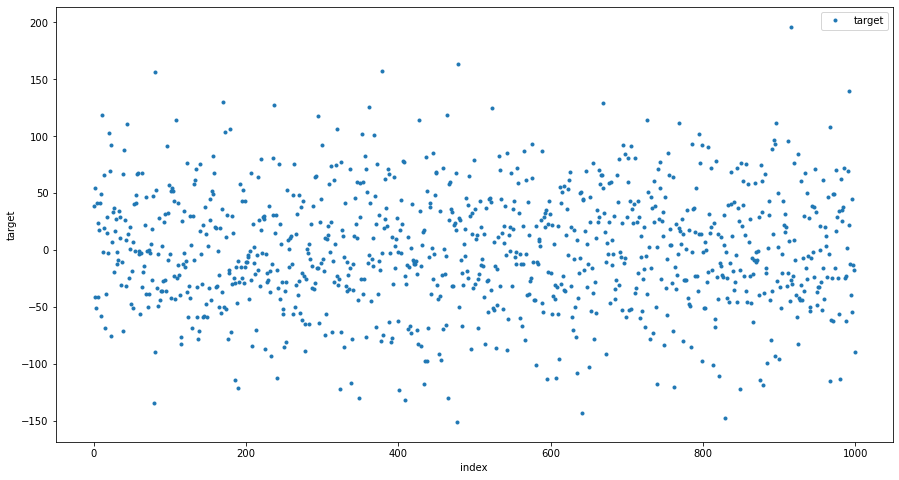

In [34]:
display(df_train.sample(10))
display(df_target.sample(10))

fig, ax = plt.subplots(1, 1)
figsize=(15, 8)
df_target.plot(style='.', figsize=figsize, ax=ax)
ax.set_xlabel('index')
ax.set_ylabel('target')

Text(0, 0.5, 'target')

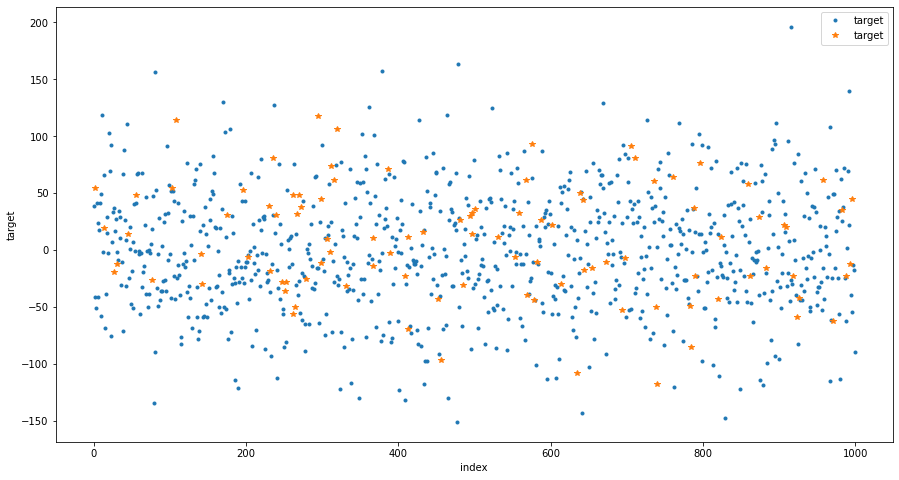

In [36]:
## Train/Test
X_train, X_test, Y_train, Y_test = train_test_split(df_train, df_target, test_size=0.1, random_state=0)

fig, ax = plt.subplots(1, 1)
figsize=(15, 8)
Y_train.plot(style='.', figsize=figsize, ax=ax)
Y_test.plot(style='*', figsize=figsize, ax=ax)
ax.set_xlabel('index')
ax.set_ylabel('target')

# 2. Preprocesamiento:  Feature scaling
* Remover la media (media=0) 
* Escalar la variance (var=1)

Sea 
### $\pmb{x_i} = (x_1,...,x_l,...x_D)$
## $$x_l^{'} = \frac{x_l - \mu{(\pmb{x_i})}}{\sigma_{\pmb{x_i}}} \in R$$ 

Donde 
### $$\mu{(\pmb{x_i})} = \frac{1}{D}\sum_{l=1}^D x_l$$

In [42]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index)
X_train_scaled.columns = X_train.columns

X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index)
X_test_scaled.columns = X_test.columns   

X_train_scaled.shape, X_test_scaled.shape

((900, 20), (100, 20))

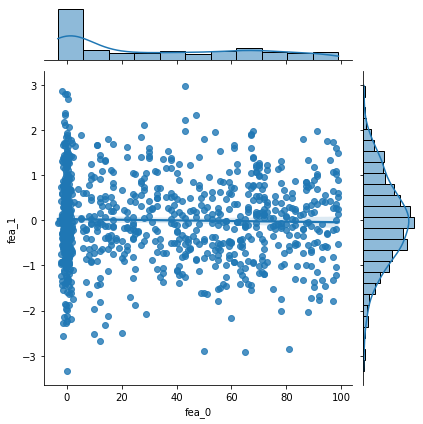

In [43]:
plot_two_num_variables(X_train, column_x='fea_0', column_y='fea_1', show_distrib=True)

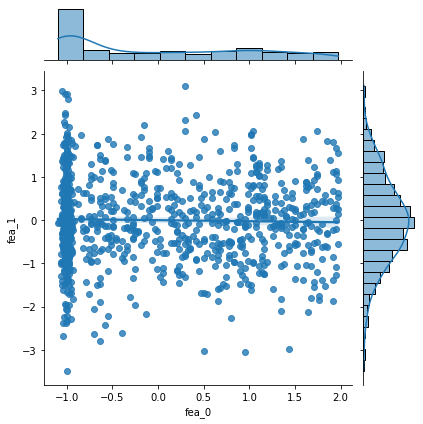

In [44]:
plot_two_num_variables(X_train_scaled, column_x='fea_0', column_y='fea_1', show_distrib=True)

# 2. Model

## Approximated function: 
## $$f(\pmb{x_i}, \pmb{\theta}) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_Dx_D \in R~;~\pmb{\theta} \in R^{D+1}$$

Donde

## $\pmb{x_i} = (x_1,...,x_l,...x_D)$

In [83]:
# cor_x = np.arange(0, 21, 0.5)*np.random.rand(42)
# cor_y = np.arange(0, 21, 0.5)*np.random.rand(42)
# x_tmp = np.array([1, 0.5, 1])
# theta_tmp = np.random.rand(3)
# theta_tmp

# print(x_tmp)
# print(theta_tmp)
# f = np.sum(x_tmp*theta_tmp)
# print(f)

# l = []
# for i in range(len(cor_x)):    
#     f = np.sum(np.array([1, cor_x[i], cor_y[i]])*theta_tmp)
#     l.append(f)
# pd.DataFrame(l).plot(style='.')    

# 3. Entrenamiento
## Loss function
## $$L(\pmb{\theta}) = \frac{1}{N}\sum_{i=1}^N (y_i - f(\pmb{x_i}, \theta))^2 \in R$$

## Encontrar $\hat{\pmb{\theta}}$ que minimize $L(\hat{\pmb{\theta}})$

## Method 1: 
## $$\frac{\partial{L(\pmb{\theta})}}{\partial{\theta_i}} = 0$$

In [45]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

y_train_predict = model.predict(X_train_scaled)
y_test_predict = model.predict(X_test_scaled)

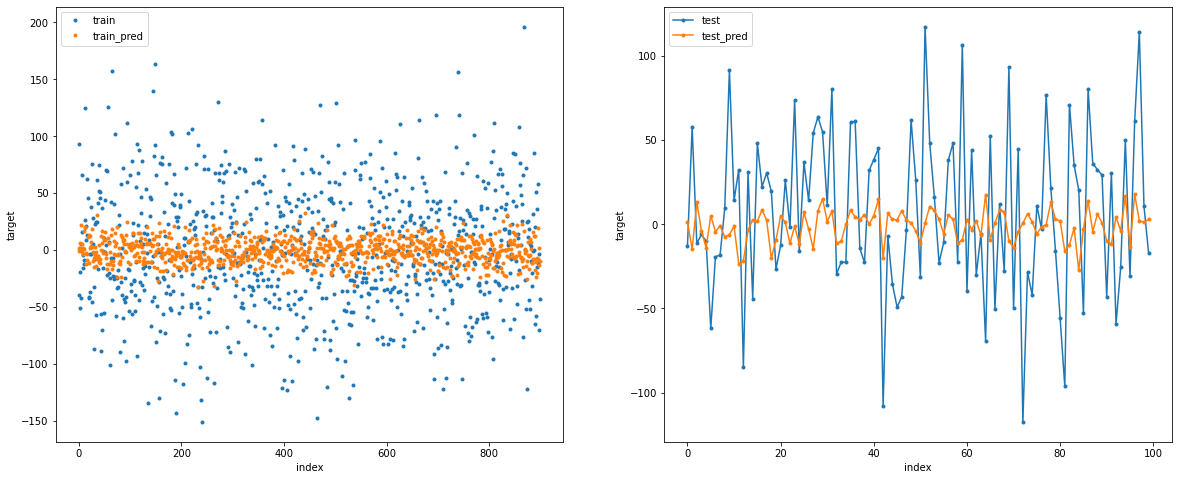

In [46]:
plot_results(Y_train, y_train_predict, Y_test, y_test_predict)

# 4 Evaluacion 

## Metricas  para regression

Lets $\hat{y}_i = f(\pmb{x_i}, \hat{\pmb{\theta}})$

### Mean squared error (MSE): 
Penalize large distances, not robust to outliers.
### $$MSE = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2 \in R$$ 
### Root Mean Squared Error (RMSE): 
$$RMSE = \sqrt{MSE} \in R$$

### Mean absolute error~(MAE):
Robust to outliers
### $$MAE = \frac{1}{N}\sum_{i=1}^N |y_i - \hat{y}_i| \in R$$

In [85]:
# Y_train = Y_train
y_train_predict = y_train_predict.reshape(-1)

# Y_test = Y_test
y_test_predict = y_test_predict.reshape(-1)

dict_metrics_train = compute_metrics_regression(Y_train.values, y_train_predict)
dict_metrics_test = compute_metrics_regression(Y_test.values, y_test_predict)

df_results = pd.DataFrame([dict_metrics_train, dict_metrics_test])
df_results.index = ['train', 'test'] 
df_results

,mse,rmse,mae
train,2583.528209,50.828419,40.420726
test,2352.781025,48.505474,39.618332


# Method de learning 2: Linear regression usando SGD

### Loss function
### $$L(\pmb{\theta}) = \frac{1}{2N}\sum_{i=1}^N (y_i - f(\pmb{x_i}, \theta))^2 + \alpha\sum_{j=1}^p \theta_j^2$$

### Stochastic Gradient Descent (SGD)    
### $$\text{Init}~\pmb{\theta}~ \text{with random values}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$
### $$\text{Repeat until converge(by some criterion)}~~~~~~~~~~~~~~~~~~~~~~~~~~$$
### $$\text{Randomly sampling a } mbatch \text{ from } \{\pmb{x_i}, y_i\}_{i=1}^N~~~$$

### $$\pmb{\theta} = \pmb{\theta} - \alpha\nabla_{\pmb{\theta}} L(\pmb{\theta})~~~~~~~~~~~~~~$$    

In [86]:
from sklearn.linear_model import SGDRegressor

304
[ 0.15521401  0.15036156  1.15441809  0.2873739  -0.67431377 -0.0325071
 -1.39204515  0.26650683  0.37387475  1.03363607 -1.21223252  1.95924637
  0.16980277  0.40739133  0.12257842  5.32329079 -1.93820962 -1.94439443
  0.4360047   0.18642834]


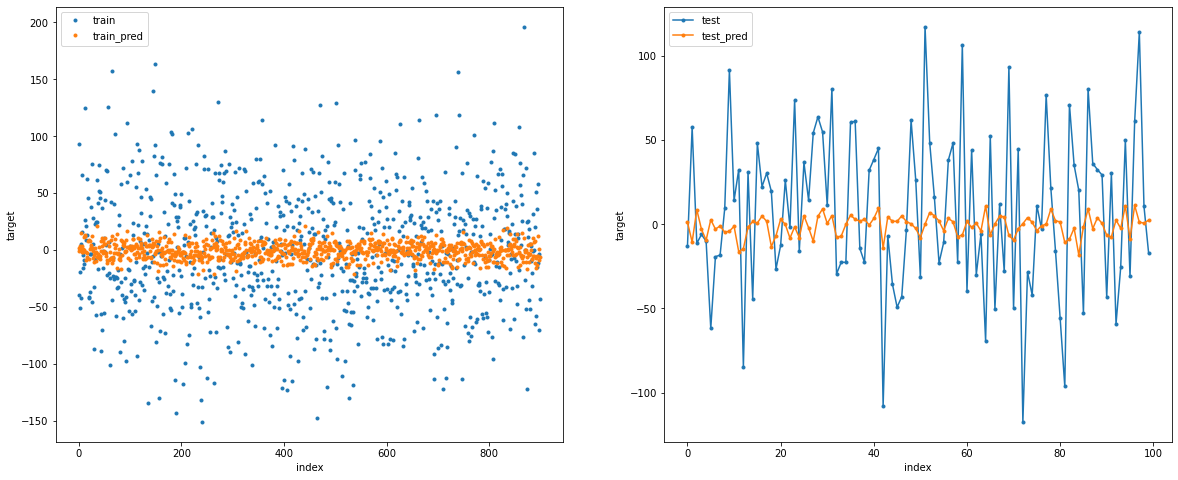

In [112]:
## Default
loss_function = 'squared_error'
learning_rate_method = 'constant'#'adaptive'#'invscaling'#'constant'
learning_rate = 0.00001

reg_method = 'l2'
alpha = 0.5

shuffle_each_epoch = True

model = SGDRegressor(loss=loss_function, learning_rate=learning_rate_method, eta0=learning_rate, 
                     penalty=reg_method, alpha=alpha, 
                     shuffle=shuffle_each_epoch, 
                     random_state=0, max_iter=1000, tol=1e-10)
model.fit(X_train_scaled, Y_train)

y_train_predict = model.predict(X_train_scaled)
y_test_predict = model.predict(X_test_scaled)

print(model.n_iter_)
print(model.coef_)
plot_results(Y_train, y_train_predict.reshape(-1,1), Y_test, y_test_predict.reshape(-1,1))

## Evaluacion 

In [113]:
dict_metrics_train = compute_metrics_regression(Y_train.values, y_train_predict)
dict_metrics_test = compute_metrics_regression(Y_test.values, y_test_predict)

df_results = pd.DataFrame([dict_metrics_train, dict_metrics_test])
df_results.index = ['train', 'test'] 
df_results

,mse,rmse,mae
train,2595.953371,50.950499,40.586872
test,2347.933908,48.455484,39.818221
